#  Predicting Player Salaries from Baseball Statistics

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load dataset

In [5]:
data=pd.read_csv('data/Hitters.csv')
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### Data preprocessing

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [112]:
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())
print(data['Salary'].isnull().sum()) 

0


In [10]:
data.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [11]:
data.shape

(322, 20)

In [12]:
data.size

6440

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

### Encoding Categorical Columns

In [66]:
lb=LabelEncoder()
data['League']=lb.fit_transform(data['League'])
data['Division']=lb.fit_transform(data['Division'])
data['NewLeague']=lb.fit_transform(data['NewLeague'])

### Correlation Analysis


Correlation Matrix:


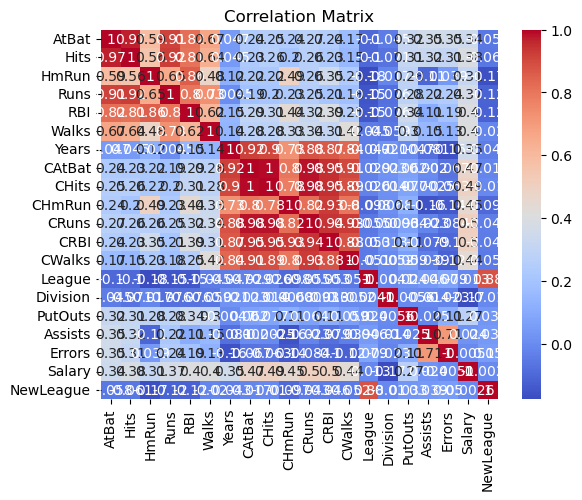

In [68]:
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Visualization

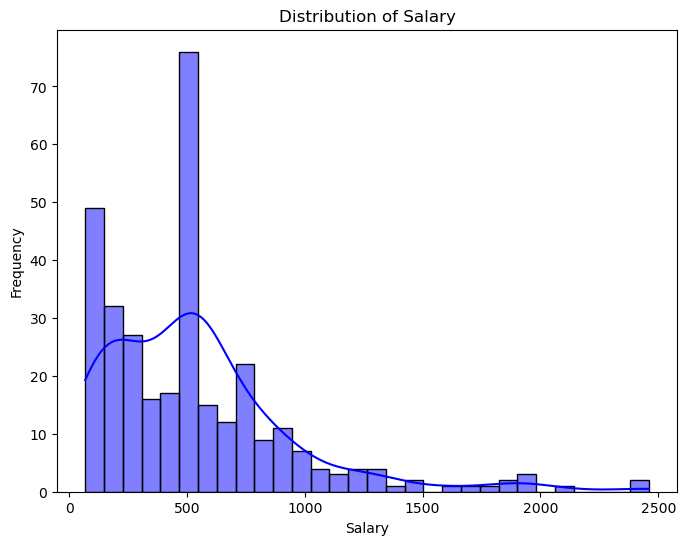

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='blue')
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

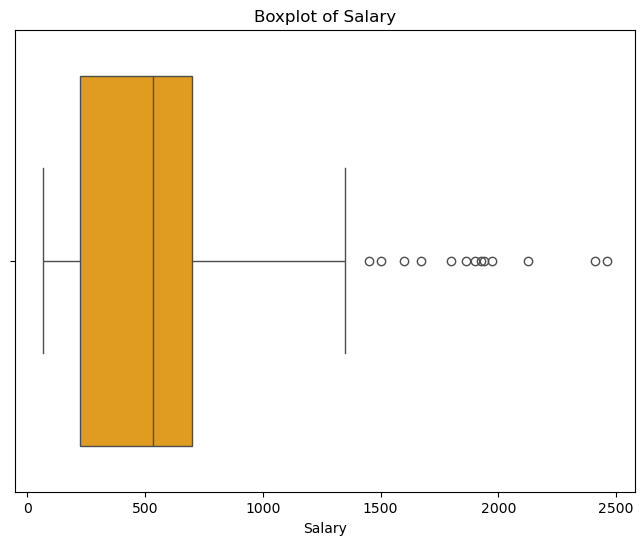

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Salary'], color='orange')
plt.title("Boxplot of Salary")
plt.show()

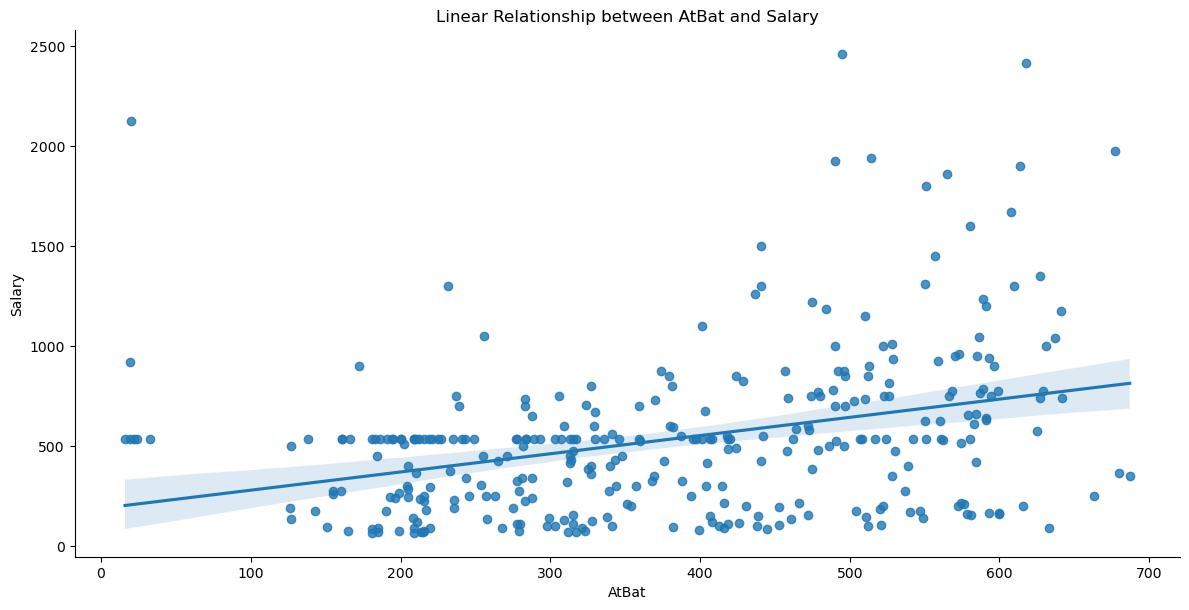

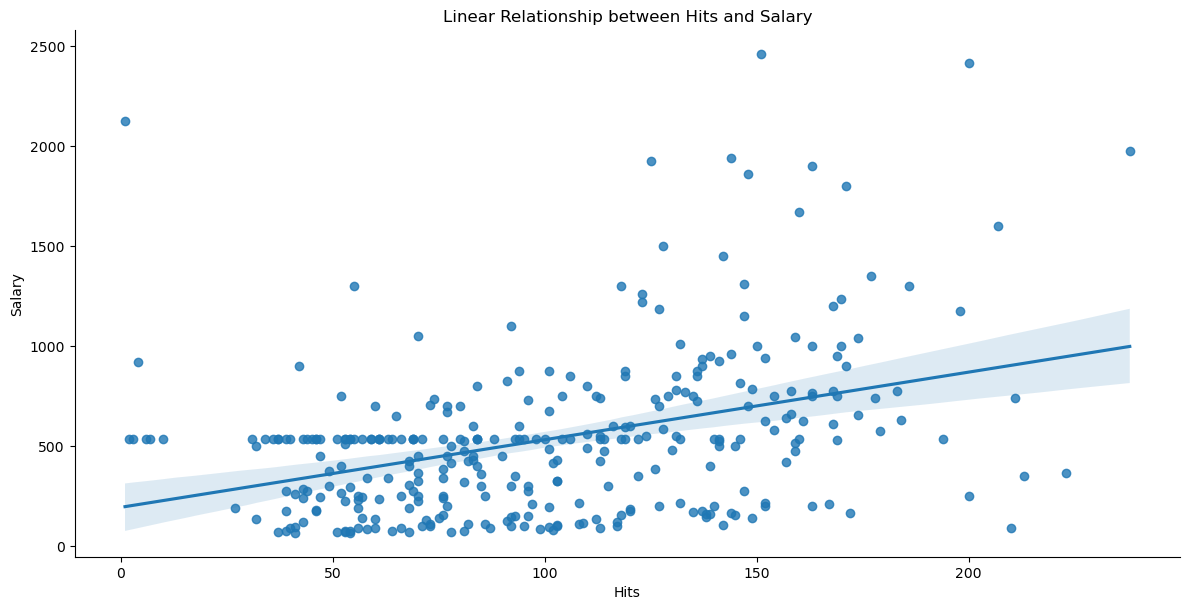

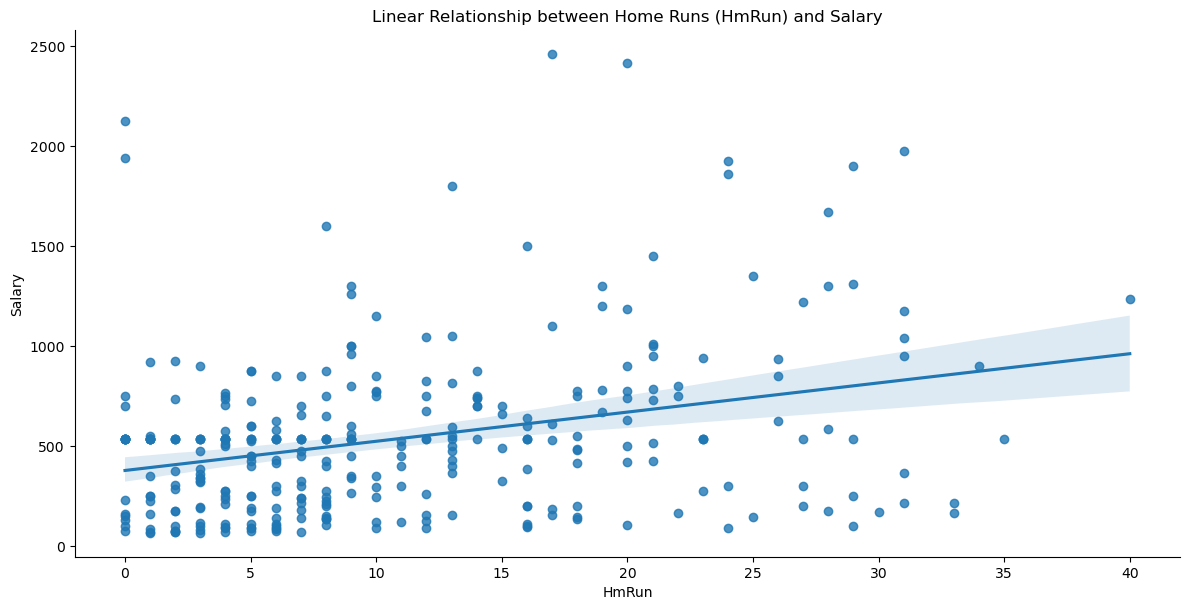

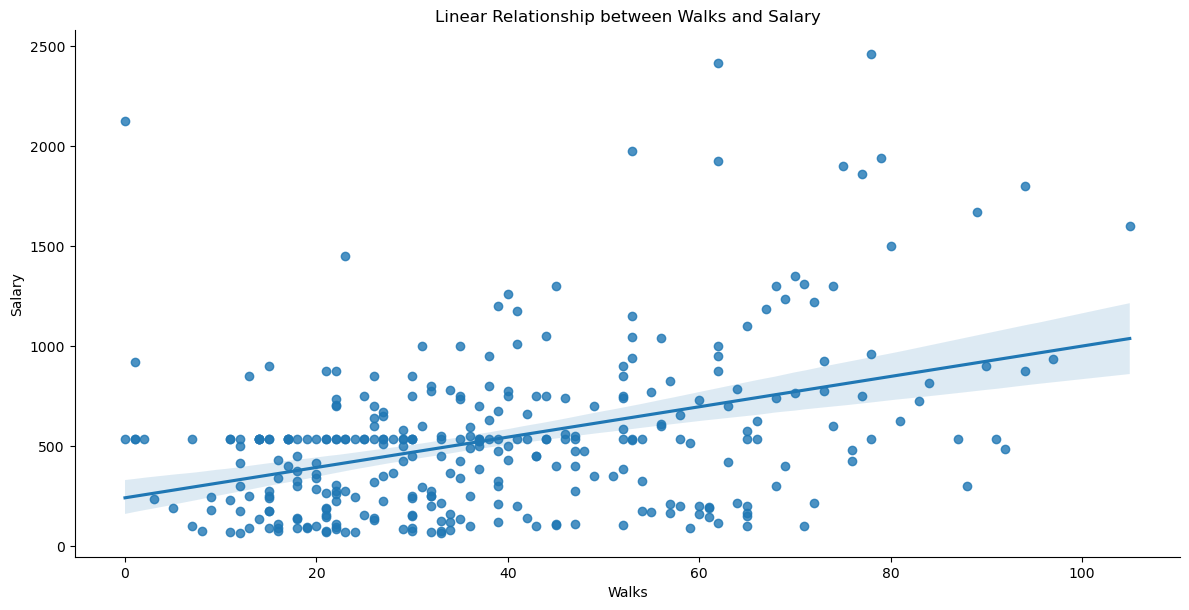

In [72]:
# lmplot for AtBat vs. Salary
sns.lmplot(x='AtBat', y='Salary', data=data, aspect=2, height=6)
plt.title("Linear Relationship between AtBat and Salary")
plt.xlabel("AtBat")
plt.ylabel("Salary")
plt.show()

# lmplot for Hits vs. Salary
sns.lmplot(x='Hits', y='Salary', data=data, aspect=2, height=6)
plt.title("Linear Relationship between Hits and Salary")
plt.xlabel("Hits")
plt.ylabel("Salary")
plt.show()

# lmplot for HmRun vs. Salary
sns.lmplot(x='HmRun', y='Salary', data=data, aspect=2, height=6)
plt.title("Linear Relationship between Home Runs (HmRun) and Salary")
plt.xlabel("HmRun")
plt.ylabel("Salary")
plt.show()

# lmplot for Walks vs. Salary
sns.lmplot(x='Walks', y='Salary', data=data, aspect=2, height=6)
plt.title("Linear Relationship between Walks and Salary")
plt.xlabel("Walks")
plt.ylabel("Salary")
plt.show()

### Splitting the Data into Features (X) and Target (Y)

In [74]:
X = data.drop('Salary', axis=1)  # Independent variables
y = data['Salary']  # Dependent variable

### Scaling the features

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the data into Training and Testing Sets

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### linear Regression Modeling

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [82]:
y_pred = model.predict(X_test)
y_pred

array([ 345.10809637,  817.48056688,  335.71487498,  658.30896909,
       1086.7279634 ,  373.10441532,  506.49874075,  592.78465602,
        159.44329065,  451.7326715 ,  774.95180229,  381.10055564,
        233.08775998,  895.3249124 ,  503.23738584,  241.8864518 ,
        565.4465428 ,  419.19095428,  626.4236939 ,  430.6545912 ,
        430.11318773,  203.08199709,  379.57866567,  912.26429213,
        477.77554703, 1026.26400182,  499.57026609,  433.10762696,
        864.57389005,  345.44029663,  690.09511254,  481.73511775,
        238.54446933,  514.37945827,  910.57854802,  326.36924972,
        330.47844373,  534.78018618,  828.28444552,  394.20053542,
        461.05675329,  432.61051942,  445.20666528,  656.3067915 ,
        381.94845464, 1215.27603177, 1256.22227583,  372.89935793,
       1009.87830617,  585.2057331 ,  382.05745815,  156.66694313,
       1426.24373414,  449.9838574 ,  543.03743377,  351.60685809,
        521.13498456, 1068.8726324 ,  439.36544271,  224.64857

### Model Coefficients and Intercept

In [84]:
print("Coefficient:",model.coef_) #m
print("Intercept:",model.intercept_) #C

Coefficient: [-253.43856967  218.93963892   44.95611836   -2.12550066  -36.25503049
  100.50501087  -32.98617645 -419.03208826  250.42367308  -43.55814323
  321.16813353  277.13281583 -190.003088     27.95087375  -54.81790845
   61.24154487   35.69935503  -22.94531134  -15.4746727 ]
Intercept: 534.2094899965896


### Visualization of Actual vs Predicted Values

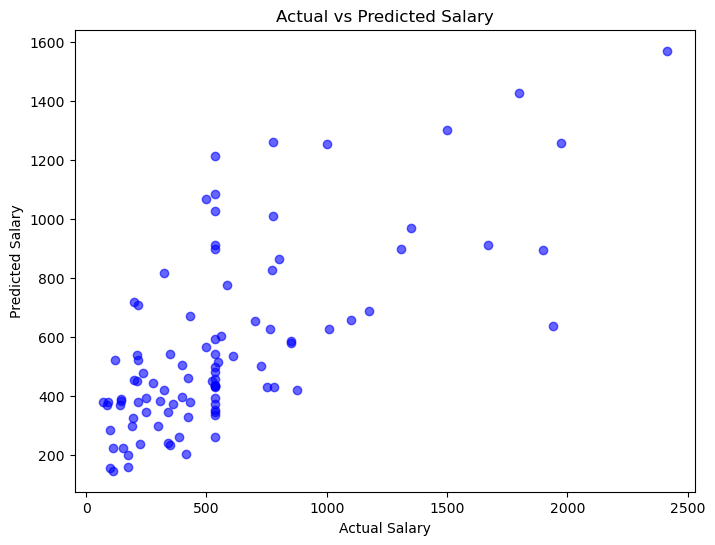

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

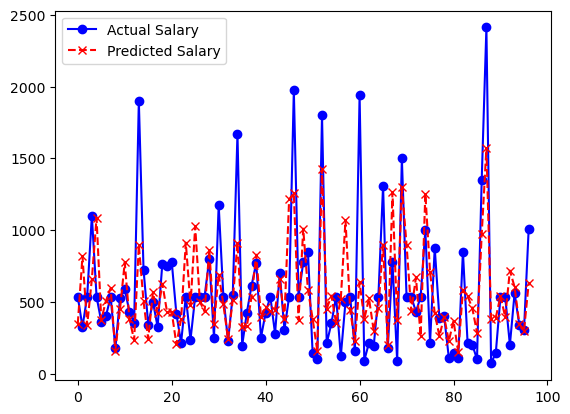

In [87]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Salary', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Salary', linestyle='--', marker='x')
plt.legend()

### Performance Metrics for Regression Models

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 241.56965991874867
Mean Squared Error (MSE): 109801.00018328859
Root Mean Squared Error (RMSE): 331.36233971785117


### Creating DataFrame to View Results

In [91]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nResults DataFrame:")
print(results_df.head())


Results DataFrame:
          Actual    Predicted
173   535.925882   345.108096
132   325.000000   817.480567
197   535.925882   335.714875
9    1100.000000   658.308969
104   535.925882  1086.727963


### R² Value Calculation

In [93]:
r2 = r2_score(y_test, y_pred)
print(f"\nR² Score: {r2}")


R² Score: 0.48395666644591095


In [94]:
#END